In [22]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import pyproj
import pandas as pd
import regex as reg


Loading Data

In [23]:
# Load the data
mastra_df = pd.read_csv('mastra.csv')
aadt_df = pd.read_excel('AADT.xlsx')

In [24]:
# Load streetnetwork
streetnetwork_df = gpd.read_file('aalborg_network.gpkg')


Preperation

In [25]:
# Convert UTM32 to latitude and longitude (WGS 84)
utm_zone = 32  # UTM zone for your coordinates
proj_utm = pyproj.CRS(f'epsg:326{utm_zone}')  # EPSG code for UTM32N
proj_wgs = pyproj.CRS('epsg:4326')  # EPSG code for WGS 84

# Create a transformer object
transformer = pyproj.Transformer.from_crs(proj_utm, proj_wgs, always_xy=True)
# Function to convert UTM to WGS84
def utm_to_wgs(row):
    try:
        lon, lat = transformer.transform(row['Xkoordinat'], row['Ykoordinat'])
    except:
        lon, lat = transformer.transform(row['X-koordinat'], row['Y-koordinat'])
    return pd.Series({'latitude': lat, 'longitude': lon})

# Convert the coordinates
mastra_df[['latitude', 'longitude']] = mastra_df[['Xkoordinat', 'Ykoordinat']].apply(utm_to_wgs, axis=1)
mastra_df.drop(['Xkoordinat', 'Ykoordinat'], inplace=True, axis=1)
aadt_df[['latitude', 'longitude']] = aadt_df[['X-koordinat', 'Y-koordinat']].apply(utm_to_wgs, axis=1)
aadt_df.drop(['X-koordinat', 'Y-koordinat'], inplace=True, axis=1)

In [26]:
pd.options.display.max_columns = None
mastra_df.columns
pd.options.display.max_rows = 20

Clean data

In [27]:
# Verify the column names in the DataFrame
print(aadt_df.columns)

# reg ex to replace , with . on the whole document
aadt_df = aadt_df.replace({',': '.'}, regex=True)

# Correct column names if necessary
columns_to_convert = [
    'Lastbil %',
    '15% hast.-fraktil', 
    '85% hast.-fraktil', 
    '% over hastighedsgr.',
    '% o. hastgr + 10km/t', 
    '% o. hastgr + 20km/t',
    'Talte dage',
    'Gennemsnitshastighed',
    'Lastbil %',
    'Største time'
]

# Convert the specified columns to float64
aadt_df = aadt_df.astype({col: 'float64' for col in columns_to_convert})


# Correct column names if necessary
columns_to_convert = [
    'Vejdel',
    'Lokalitet',
    'Vejnavn',
    'Køretøjsart',
    'StedId'
]

# Convert the specified columns to float64
aadt_df = aadt_df.astype({col: 'string' for col in columns_to_convert})

Index(['Dataejer', 'Bestyrer', 'Adm.vejnr', 'Vejdel', 'Kilometer', 'Meter',
       'Lokalitet', 'Vejnavn', 'Køretøjsart', 'År', 'StedId', 'Talte dage',
       'ÅDT', 'HDT', 'JDT', 'HDT.1', 'Gennemsnitshastighed', 'Æ10 Høj',
       'Æ10 Lav', 'Lastbil ÅDT', 'o. 1250 ÅDT', 'Lastbil %',
       '15% hast.-fraktil', '85% hast.-fraktil', '% over hastighedsgr.',
       '% o. hastgr + 10km/t', '% o. hastgr + 20km/t', 'Hastighedsgrænse',
       'Største time', 'Største time datotid', 'Morgen spids time',
       'Morgen spids st. tid', 'Efterm. spids time', 'Efterm. spids st. t.',
       'latitude', 'longitude'],
      dtype='object')


In [28]:
aadt_df['Største time datotid'] = pd.to_datetime(aadt_df['Største time datotid'], errors='coerce')
aadt_df['Morgen spids st. tid'] = aadt_df['Morgen spids st. tid'].replace(':', np.nan)
aadt_df['Morgen spids st. tid (since Midnight)'] = pd.to_timedelta(aadt_df['Morgen spids st. tid'] + ':00', errors='coerce')
aadt_df.drop('Morgen spids st. tid', axis=1, inplace=True)


aadt_df['Efterm. spids st. t.'] = aadt_df['Efterm. spids st. t.'].replace(':', np.nan)
aadt_df['Efterm. spids st. t. (since Midnight)'] = pd.to_timedelta(aadt_df['Efterm. spids st. t.'] + ':00', errors='coerce')
aadt_df.drop('Efterm. spids st. t.', axis=1, inplace=True)

C:\Users\gonde\AppData\Local\Temp\ipykernel_852\4129793633.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aadt_df['Største time datotid'] = pd.to_datetime(aadt_df['Største time datotid'], errors='coerce')


mastra

In [29]:
# Verify the column names in the DataFrame
print(mastra_df.columns)

# reg ex to replace , with . on the whole document
mastra_df = mastra_df.replace({',': '.'}, regex=True)
mastra_df = mastra_df.replace({'LÃ¸rdag': "Loerdag"}, regex=True)
mastra_df = mastra_df.replace({'SÃ¸ndag': "Soendag"}, regex=True)


mastra_df.rename(columns={'MÃ¥ned': 'Maened'}, inplace=True)
mastra_df.rename(columns={'Ãrstal': 'Aarstal'}, inplace=True)
mastra_df.rename(columns={'ï»¿Vej-Id': 'Vej-Id'}, inplace=True)

mastra_df.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)

# Correct column names if necessary
columns_to_convert = [

]

# Convert the specified columns to float64
mastra_df = mastra_df.astype({col: 'float64' for col in columns_to_convert})


# Correct column names if necessary
columns_to_convert = [
    'Trafiktype',
    'Dagtype',
    'Vej-Id',
    'Retning',
    'Trafiktype'
]

# Convert the specified columns to float64
mastra_df = mastra_df.astype({col: 'string' for col in columns_to_convert})

mastra_df = mastra_df.replace({'<NA>': ""}, regex=True)

Index(['ï»¿Vej-Id', 'Unnamed: 1', 'Unnamed: 2', 'Kilometer', 'Retning', 'Spor',
       'Dato', 'Ãrstal', 'MÃ¥ned', 'Dag',
       ...
       '22:00-22:15', '22:15-22:30', '22:30-22:45', '22:45-23:00',
       '23:00-23:15', '23:15-23:30', '23:30-23:45', '23:45-24:00', 'latitude',
       'longitude'],
      dtype='object', length=110)


Plot to make sure everything is fine

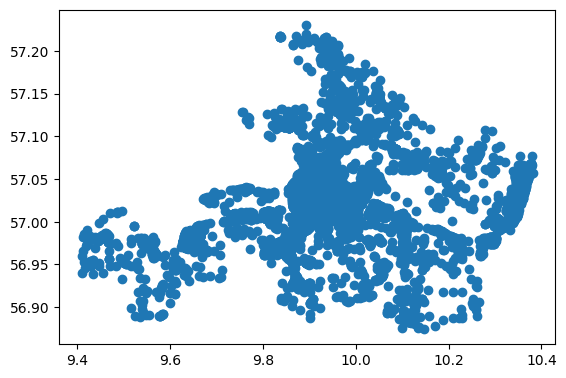

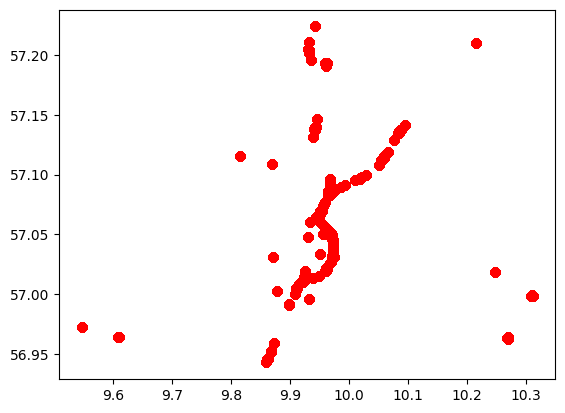

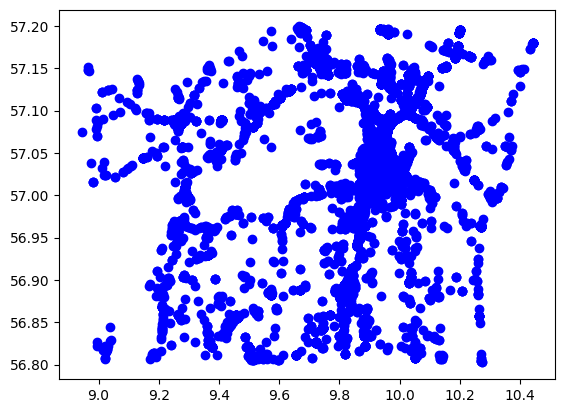

In [30]:
streetnetwork_df.plot()
plt.show()

plt.scatter(mastra_df['longitude'], mastra_df['latitude'], c='red')
plt.show()

plt.scatter(aadt_df['longitude'], aadt_df['latitude'], c='blue')
plt.show()


Merge

In [31]:
# load geopackage 
import osmnx as ox
import networkx as nx

# Load the graph from the GeoPackage file
G = ox.load_graphml('aalborg_network.graphml')

In [32]:
# Convert mastra_df and aadt_df to GeoDataFrames
mastra_gdf = gpd.GeoDataFrame(
    mastra_df,
    geometry=gpd.points_from_xy(mastra_df['longitude'], mastra_df['latitude']),
    crs="EPSG:4326"  # Assuming WGS84 coordinates
)

aadt_gdf = gpd.GeoDataFrame(
    aadt_df,
    geometry=gpd.points_from_xy(aadt_df['longitude'], aadt_df['latitude']),
    crs="EPSG:4326"  # Assuming WGS84 coordinates
)

# Ensure the street network GeoDataFrame is in the same CRS
if streetnetwork_df.crs.to_epsg() != 4326:
    streetnetwork_df = streetnetwork_df.to_crs("EPSG:4326")

# Re-project the street network to UTM32 (EPSG:32632)
utm_crs = "EPSG:32632"  # UTM zone 32N (for Denmark)
streetnetwork_utm = streetnetwork_df.to_crs(utm_crs)

# Re-project the mastra_df and aadt_df to UTM32
mastra_utm = mastra_gdf.to_crs(utm_crs)
aadt_utm = aadt_gdf.to_crs(utm_crs)

In [33]:
# Identify the columns that are not part of the time intervals
id_vars_columns = [
    'Vej-Id', 'Kilometer', 'Retning', 'Spor', 'Dato', 'Aarstal', 
    'Maened', 'Dag', 'Dagtype', 'Trafiktype', 'latitude', 'longitude', 'geometry'
]

# The time interval columns
time_columns = [
    "00:00-00:15","00:15-00:30","00:30-00:45","00:45-01:00","01:00-01:15","01:15-01:30","01:30-01:45","01:45-02:00","02:00-02:15","02:15-02:30","02:30-02:45","02:45-03:00","03:00-03:15","03:15-03:30","03:30-03:45","03:45-04:00","04:00-04:15","04:15-04:30","04:30-04:45","04:45-05:00","05:00-05:15","05:15-05:30","05:30-05:45","05:45-06:00","06:00-06:15","06:15-06:30","06:30-06:45","06:45-07:00","07:00-07:15","07:15-07:30","07:30-07:45","07:45-08:00","08:00-08:15","08:15-08:30","08:30-08:45","08:45-09:00","09:00-09:15","09:15-09:30","09:30-09:45","09:45-10:00","10:00-10:15","10:15-10:30","10:30-10:45","10:45-11:00","11:00-11:15","11:15-11:30","11:30-11:45","11:45-12:00","12:00-12:15","12:15-12:30","12:30-12:45","12:45-13:00","13:00-13:15","13:15-13:30","13:30-13:45","13:45-14:00","14:00-14:15","14:15-14:30","14:30-14:45","14:45-15:00","15:00-15:15","15:15-15:30","15:30-15:45","15:45-16:00","16:00-16:15","16:15-16:30","16:30-16:45","16:45-17:00","17:00-17:15","17:15-17:30","17:30-17:45","17:45-18:00","18:00-18:15","18:15-18:30","18:30-18:45","18:45-19:00","19:00-19:15","19:15-19:30","19:30-19:45","19:45-20:00","20:00-20:15","20:15-20:30","20:30-20:45","20:45-21:00","21:00-21:15","21:15-21:30","21:30-21:45","21:45-22:00","22:00-22:15","22:15-22:30","22:30-22:45","22:45-23:00","23:00-23:15","23:15-23:30","23:30-23:45","23:45-24:00"
]

# Melt the DataFrame to reshape it from wide format to long format
mastra_long = pd.melt(
    mastra_utm,
    id_vars=id_vars_columns,  # Columns that uniquely identify each row
    value_vars=time_columns,  # Time interval columns
    var_name='time_interval',  # Name of the new column for the time intervals
    value_name='traffic_flow'  # Name for the traffic flow data
)

# Check the result
print(mastra_long['Vej-Id'].value_counts())


Vej-Id
0 90-5 14/ 925 T          61344
851 8512717-0 1/ 515 -    61344
0 80-3 296/ 950 T         61344
0 77-2 294/ 200 T         61344
0 80-6 302/ 970 T         61344
                          ...  
0 76-0 0/ 453 +2          26304
0 76-0 0/ 453 -           26304
0 76-0 0/ 453 -2          26304
0 76-0 0/ 453 -1          26304
0 90-11 17/ 300 T         25440
Name: count, Length: 485, dtype: Int64


In [34]:
# Extract the start time from 'time_interval'
mastra_long['time_start'] = mastra_long['time_interval'].str[:5]  # Extracts the "00:00" part for sorting

mastra_long['datetime'] = pd.to_datetime(mastra_long['Dato'] + " " + mastra_long['time_start'], dayfirst=True)

mastra_long = mastra_long.sort_values(by=['Vej-Id', 'Dato', 'time_start'])

# Result
mastra_long.head()

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,latitude,longitude,geometry,time_interval,traffic_flow,time_start,datetime
33655,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:00-00:15,10.0,00:00,2023-02-01 00:00:00
302697,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:15-00:30,10.0,00:15,2023-02-01 00:15:00
571739,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:30-00:45,7.0,00:30,2023-02-01 00:30:00
840781,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:45-01:00,3.0,00:45,2023-02-01 00:45:00
1109823,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),01:00-01:15,3.0,01:00,2023-02-01 01:00:00


In [35]:
import networkx as nx
import osmnx as ox
import geopandas as gpd

G = ox.load_graphml('aalborg_network.graphml')

# Assuming you've already downloaded or loaded your graph 'G'
# Project the graph to UTM (osmnx will automatically select the appropriate UTM zone)
G_proj = ox.project_graph(G)

# Convert the projected graph to two GeoDataFrames: one for nodes, one for edges
nodes_proj, edges_proj = ox.graph_to_gdfs(G_proj)

# Ensure the GeoDataFrames are in the correct UTM CRS (osmnx projection typically defaults to UTM)
# Re-project if necessary (though this is likely redundant)
utm_crs = "EPSG:32632"  # Assuming Denmark (UTM zone 32N)
edges_proj = edges_proj.to_crs(utm_crs)
nodes_proj = nodes_proj.to_crs(utm_crs)

# Display the projected geometries for the nodes (x, y are in UTM Eastings and Northings)
print(nodes_proj[['x', 'y']].head())

# Re-project other datasets to UTM32 (EPSG:32632) to match the graph's projection
mastra_utm = mastra_long.to_crs(utm_crs)
aadt_utm = aadt_gdf.to_crs(utm_crs)

# Extract the UTM coordinates from the geometry column and create new 'x' (Easting) and 'y' (Northing) columns
mastra_utm['x'] = mastra_utm.geometry.x
mastra_utm['y'] = mastra_utm.geometry.y

# Now, mastra_utm contains UTM coordinates (x, y) like nodes_proj
print(mastra_utm[['x', 'y']].head())

                        x             y
osmid                                  
27464487    555703.245935  6.324410e+06
3464359269  555709.985266  6.324414e+06
358455595   555814.727122  6.324243e+06
27464493    555948.369171  6.324173e+06
332676258   555925.675016  6.324185e+06
                x          y
33655    552601.0  6329842.0
302697   552601.0  6329842.0
571739   552601.0  6329842.0
840781   552601.0  6329842.0
1109823  552601.0  6329842.0


KeyboardInterrupt: 

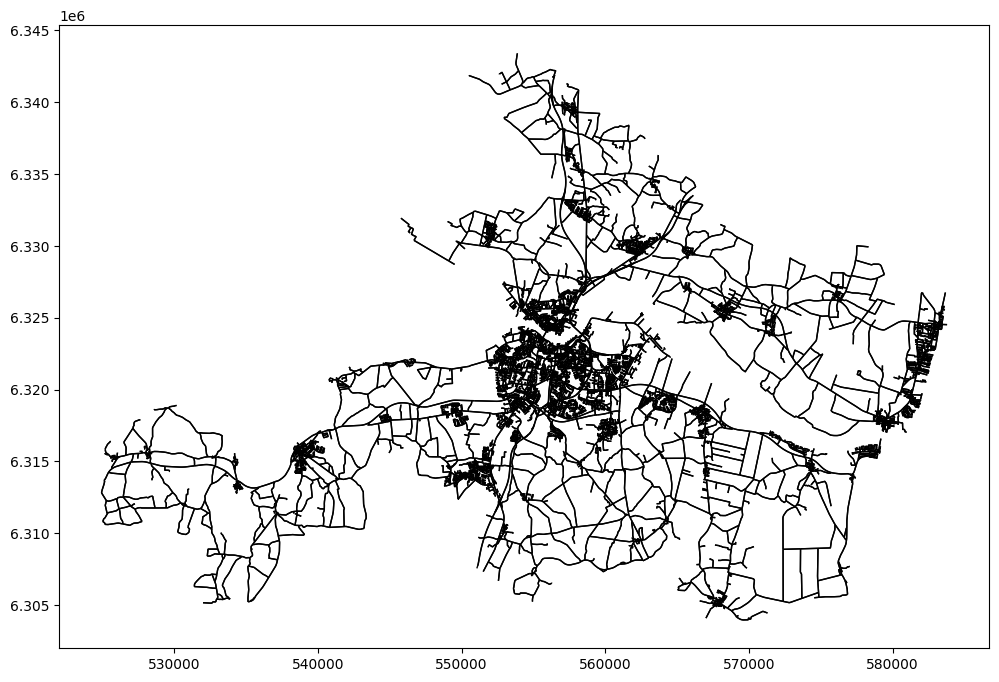

In [36]:
import matplotlib.pyplot as plt
import osmnx as ox

# Plot the street network edges (edges_proj contains the road segments)
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the street network (edges)
edges_proj.plot(ax=ax, linewidth=1, edgecolor="black", label="Street Network")

# Plot mastra points on top (in red)
mastra_utm.plot(ax=ax, color='red', label='Time Series Points', markersize=10)

# Plot aadt points on top (in blue)
#aadt_utm.plot(ax=ax, color='blue', label='AADT Points', markersize=2)

# Add a legend
plt.legend()

# Set the title and show the plot
plt.title('Street Network with Mastra and AADT Points')
plt.show()


In [17]:
# # Print the edge attributes for the first edge in the graph
# for u, v, data in G.edges(data=True):
#     print(f"Edge from {u} to {v} with attributes {data}")
#     break

# # print the node attributes 
# for node, data in G.nodes(data=True):
#     print(f"Node {node} has attributes {data}")
#     break


In [16]:
for u, data in edges_proj.iterrows():
    print(f"Edge from {u} with attributes {data['geometry']}")
    break
    

Edge from (27464487, 3464359269, 0) with attributes LINESTRING (555703.2459350697 6324409.648959474, 555709.9852663105 6324413.691876737)


In [18]:
mastra_utm

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,latitude,longitude,geometry,time_interval,traffic_flow,time_start,datetime,x,y
33655,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:00-00:15,10.0,00:00,2023-02-01 00:00:00,552601.0,6329842.0
302697,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:15-00:30,10.0,00:15,2023-02-01 00:15:00,552601.0,6329842.0
571739,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:30-00:45,7.0,00:30,2023-02-01 00:30:00,552601.0,6329842.0
840781,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),00:45-01:00,3.0,00:45,2023-02-01 00:45:00,552601.0,6329842.0
1109823,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,57.108891,9.868442,POINT (552601.000 6329842.000),01:00-01:15,3.0,01:00,2023-02-01 01:00:00,552601.0,6329842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25747273,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,POINT EMPTY,23:45-24:00,NaN,23:45,NaT,NaN,NaN
25759323,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,POINT EMPTY,23:45-24:00,NaN,23:45,NaT,NaN,NaN
25770427,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,POINT EMPTY,23:45-24:00,NaN,23:45,NaT,NaN,NaN
25793566,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,POINT EMPTY,23:45-24:00,NaN,23:45,NaT,NaN,NaN


In [21]:
import networkx as nx
import osmnx as ox
from shapely.geometry import Point

# Initialize a dictionary to store the nearest edge for each point and avoid recomputation
nearest_edges_cache = {}

# Initialize a set to track which edges have already been processed
processed_edges = set()

# Function to find and cache the nearest edge for a point
def find_and_cache_nearest_edge(G_proj, point, point_idx):
    if point_idx not in nearest_edges_cache:
        # Find the nearest edge and store it in the cache
        nearest_edge = ox.distance.nearest_edges(G_proj, X=point.x, Y=point.y)
        nearest_edges_cache[point_idx] = nearest_edge
    return nearest_edges_cache[point_idx]

# Function to embed time series data into the graph's nearest edge
def embed_time_series_data_to_edge(G_proj, point_idx, time_series_data, point_geom):
    nearest_edge = find_and_cache_nearest_edge(G_proj, point_geom, point_idx)
    
    # Extract u, v, and key for the nearest edge
    u, v, key = nearest_edge
    
    # Create a unique edge identifier (tuple of u, v, key)
    edge_id = (u, v, key)
    
    # Check if this edge has already been processed, if so, skip it
    if edge_id in processed_edges:
        print(f"Edge {edge_id} already processed, skipping.")
        return
    
    # Check if the edge already has the time series data attribute, if not, initialize it
    if 'time_series' not in G_proj[u][v][key]:
        G_proj[u][v][key]['time_series'] = []
    
    # Add the new time series data (or append if there is already data)
    if time_series_data not in G_proj[u][v][key]['time_series']:
        G_proj[u][v][key]['time_series'].append(time_series_data)
        print(f"Added time series data to edge {edge_id}")

    # Mark this edge as processed
    processed_edges.add(edge_id)

# Iterate over mastra_utm and embed time series data
for idx, row in mastra_utm.iterrows():
    point_geom = Point(row['x'], row['y'])  # Create Point geometry
    time_series_data = row['traffic_flow']  # Assuming there is a 'traffic_flow' column for the time series

    # Embed the time series data into the graph edge
    embed_time_series_data_to_edge(G_proj, idx, time_series_data, point_geom)

# Example: Check the graph to see the time series data embedded in the edges
for u, v, key, data in G_proj.edges(keys=True, data=True):
    if 'time_series' in data:
        print(f"Edge ({u}, {v}, {key}) has time series data: {data['time_series']}")


Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (1153165839, 1153164044, 0) already processed, skipping.
Edge (11

KeyboardInterrupt: 

In [19]:
# # Calculate distances to find the nearest nodes
# nodes_proj['geometry'] = nodes_proj.apply(lambda row: Point(row['x'], row['y']), axis=1)

# # Create a GeoDataFrame for the nodes
# nodes_gdf = gpd.GeoDataFrame(nodes_proj, geometry='geometry', crs=mastra_gdf.crs)

# # Use sjoin_nearest to find the closest nodes
# mastra_with_closest_nodes = gpd.sjoin_nearest(mastra_gdf, nodes_gdf, how="left", distance_col="distance_to_node")

# # Display the result
# print(mastra_with_closest_nodes[['Vej-Id', 'datetime', 'traffic_flow', 'osmid', 'distance_to_node']].head())
